# Import Library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import joblib
import warnings
warnings.filterwarnings('ignore')

# Data Load

In [4]:
df = pd.read_csv("data/train.csv")
df.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


# Data Understanding

In [5]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [7]:
df.describe(include="all")

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000,90015,100000,100000,100000,100000,84998.000000,100000.000000,...,100000,100000,100000.000000,90970,100000,100000.000000,95521,100000,98800,100000
unique,100000,12500,8,10139,1788,12501,16,18940,NaN,NaN,...,4,13178,NaN,404,3,NaN,91049,7,98792,3
top,0x25fb6,CUS_0x942c,January,Langep,38,#F%$D@*&8,_______,17273.83,NaN,NaN,...,Standard,1360.45,NaN,15 Years and 11 Months,Yes,NaN,__10000__,Low_spent_Small_value_payments,__-333333333333333333333333333__,Standard
freq,1,8,12500,44,2833,5572,7062,16,NaN,NaN,...,36479,24,NaN,446,52326,NaN,4305,25513,9,53174
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4194.170850,17.091280,...,NaN,NaN,32.285173,NaN,NaN,1403.118217,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3183.686167,117.404834,...,NaN,NaN,5.116875,NaN,NaN,8306.041270,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,303.645417,-1.000000,...,NaN,NaN,20.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1625.568229,3.000000,...,NaN,NaN,28.052567,NaN,NaN,30.306660,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3093.745000,6.000000,...,NaN,NaN,32.305784,NaN,NaN,69.249473,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5957.448333,7.000000,...,NaN,NaN,36.496663,NaN,NaN,161.224249,NaN,NaN,NaN,NaN


In [8]:
# Helper function to change data type
def return_null(val):
    if isinstance(val, str) and "__" in val:
        return np.nan
    elif isinstance(val, str) and "_" in val:
        return np.nan
    else:
        return val

In [9]:
# Change invalid value "__" or "_" into nan and data type
new_df = df.copy()
invalid_numerical_columns = [
    'Age',
    'Annual_Income',
    'Monthly_Inhand_Salary',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Amount_invested_monthly',
    'Monthly_Balance'
]

for col in invalid_numerical_columns:
  new_df[col] = new_df[col].apply(return_null)
  new_df[col] = new_df[col].astype('float')

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       95061 non-null   float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             93020 non-null   float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               95215 non-null   float64
 13  Type_of_Loan              88592 non-null   ob

In [10]:
# Helper Function to change credit history age into months
# e.g. 2 years 5 months = 29 months
def cal_history_age(val):
    try:
        year, monnth = 0, 0
        if re.search("year", val, re.IGNORECASE):
            year = int(re.findall('\d+', val)[0])
        if re.search("month", val, re.IGNORECASE):
            month = int(re.findall('\d+', val)[1])
        return year*12+month
    except:
        return np.nan

In [11]:
new_df['Credit_History_Age'] = new_df['Credit_History_Age'].apply(cal_history_age)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       95061 non-null   float64
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             93020 non-null   float64
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               95215 non-null   float64
 13  Type_of_Loan              88592 non-null   ob

In [12]:
# Feature Selection
# Annual_Income dan Monthly_Inhand_Salary represent same thing, drop one of them
new_df.drop(["ID", "Name", "SSN", "Annual_Income"], axis=1, inplace=True)

In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customer_ID               100000 non-null  object 
 1   Month                     100000 non-null  object 
 2   Age                       95061 non-null   float64
 3   Occupation                100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               95215 non-null   float64
 9   Type_of_Loan              88592 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    90254 non-null   float64
 12  Changed_Credit_Limit      97909 non-null   float64
 13  Num_Credit_Inquiries      98035 non-null   fl

In [14]:
numerical_columns = [
    'Age',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Credit_Utilization_Ratio',
    'Total_EMI_per_month',
    'Amount_invested_monthly',
    'Monthly_Balance',
    'Credit_History_Age'
]

new_df[numerical_columns].describe()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age
count,95061.000000,84998.000000,100000.000000,100000.00000,100000.000000,95215.000000,100000.000000,90254.000000,97909.000000,98035.000000,98991.000000,100000.000000,100000.000000,91216.000000,98791.000000,90970.000000
mean,110.934505,4194.170850,17.091280,22.47443,72.466040,2.780339,21.068780,31.033051,10.389025,27.754251,1426.503700,32.285173,1403.118217,195.539456,402.551258,221.195405
std,689.407864,3183.686167,117.404834,129.05741,466.422621,62.500940,14.860104,226.955758,6.789496,193.177339,1155.045753,5.116875,8306.041270,199.564527,213.925499,99.741364
min,-500.000000,303.645417,-1.000000,0.00000,1.000000,-100.000000,-5.000000,-3.000000,-6.490000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760,1.000000
25%,24.000000,1625.568229,3.000000,4.00000,8.000000,1.000000,10.000000,9.000000,5.320000,3.000000,566.080000,28.052567,30.306660,72.236692,270.106630,144.000000
50%,33.000000,3093.745000,6.000000,5.00000,13.000000,3.000000,18.000000,14.000000,9.400000,6.000000,1166.370000,32.305784,69.249473,128.954538,336.731225,219.000000
75%,42.000000,5957.448333,7.000000,7.00000,20.000000,5.000000,28.000000,18.000000,14.870000,9.000000,1948.200000,36.496663,161.224249,236.815814,470.262938,302.000000
max,8698.000000,15204.633333,1798.000000,1499.00000,5797.000000,1496.000000,67.000000,4397.000000,36.970000,2597.000000,4998.070000,50.000000,82331.000000,1977.326102,1602.040519,404.000000


In [15]:
# Validation some uncommon values
def check_invalid_values(df, invalid_value, column):
    df = df.copy()
    customer_id = df[(df[column] == invalid_value)].groupby(by="Customer_ID", as_index=False)['Num_Bank_Accounts'].mean()
    print(df[df.Customer_ID.isin(customer_id.Customer_ID)])

check_invalid_values(new_df, -500, "Age")

      Customer_ID     Month    Age Occupation  Monthly_Inhand_Salary  \
0       CUS_0xd40   January   23.0  Scientist            1824.843333   
1       CUS_0xd40  February   23.0  Scientist                    NaN   
2       CUS_0xd40     March -500.0  Scientist                    NaN   
3       CUS_0xd40     April   23.0  Scientist                    NaN   
4       CUS_0xd40       May   23.0  Scientist            1824.843333   
...           ...       ...    ...        ...                    ...   
99963  CUS_0x372c     April -500.0     Lawyer                    NaN   
99964  CUS_0x372c       May   18.0     Lawyer            3468.315833   
99965  CUS_0x372c      June   19.0     Lawyer            3468.315833   
99966  CUS_0x372c      July   19.0     Lawyer            3468.315833   
99967  CUS_0x372c    August   19.0     Lawyer            3468.315833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                      3                4              3      

In [16]:
new_df["Age"] = new_df.Age.apply(lambda x: np.nan if x<0 or x>90 else x)
new_df["Num_Bank_Accounts"] = new_df.Num_Bank_Accounts.apply(lambda x: np.nan if x<0 or x>15 else x)
new_df["Num_Credit_Card"] = new_df.Num_Credit_Card.apply(lambda x: np.nan if x<0 or x>15 else x)
new_df["Interest_Rate"] = new_df.Interest_Rate.apply(lambda x: np.nan if x>50 else x)
new_df["Num_of_Loan"] = new_df.Num_of_Loan.apply(lambda x: np.nan if x<0 or x>10 else x)
new_df["Delay_from_due_date"] = new_df.Delay_from_due_date.apply(lambda x: 0.0 if x<0 else x)
new_df["Num_of_Delayed_Payment"] = new_df.Num_of_Delayed_Payment.apply(lambda x: np.nan if x<0 or x>30 else x)
new_df["Changed_Credit_Limit"] = new_df.Changed_Credit_Limit.apply(lambda x: 0.0 if x<0 else x)
new_df["Num_Credit_Inquiries"] = new_df.Num_Credit_Inquiries.apply(lambda x: np.nan if x>25 else x)
new_df["Total_EMI_per_month"] = new_df.Total_EMI_per_month.apply(lambda x: np.nan if x>1400 else x)

new_df[numerical_columns].describe(include="all")

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age
count,92365.000000,84998.000000,98664.000000,97732.000000,97966.000000,90892.000000,100000.000000,88915.000000,97909.000000,96385.000000,98991.000000,100000.000000,96781.000000,91216.000000,98791.000000,90970.000000
mean,33.314145,4194.170850,5.368980,5.533612,14.531603,3.534172,21.081910,13.424529,10.427352,5.781117,1426.503700,32.285173,106.036989,195.539456,402.551258,221.195405
std,10.770143,3183.686167,2.592451,2.068336,8.739748,2.447488,14.840204,6.207212,6.720510,3.860712,1155.045753,5.116875,122.739064,199.564527,213.925499,99.741364
min,14.000000,303.645417,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.000000,0.000000,0.000000,0.007760,1.000000
25%,24.000000,1625.568229,3.000000,4.000000,7.000000,2.000000,10.000000,9.000000,5.320000,3.000000,566.080000,28.052567,29.270265,72.236692,270.106630,144.000000
50%,33.000000,3093.745000,5.000000,5.000000,13.000000,3.000000,18.000000,14.000000,9.400000,5.000000,1166.370000,32.305784,66.413778,128.954538,336.731225,219.000000
75%,42.000000,5957.448333,7.000000,7.000000,20.000000,5.000000,28.000000,18.000000,14.870000,8.000000,1948.200000,36.496663,146.701253,236.815814,470.262938,302.000000
max,56.000000,15204.633333,11.000000,15.000000,34.000000,9.000000,67.000000,28.000000,36.970000,17.000000,4998.070000,50.000000,1396.000000,1977.326102,1602.040519,404.000000


In [17]:
new_df[numerical_columns].isnull().sum()

Age                          7635
Monthly_Inhand_Salary       15002
Num_Bank_Accounts            1336
Num_Credit_Card              2268
Interest_Rate                2034
Num_of_Loan                  9108
Delay_from_due_date             0
Num_of_Delayed_Payment      11085
Changed_Credit_Limit         2091
Num_Credit_Inquiries         3615
Outstanding_Debt             1009
Credit_Utilization_Ratio        0
Total_EMI_per_month          3219
Amount_invested_monthly      8784
Monthly_Balance              1209
Credit_History_Age           9030
dtype: int64

In [ ]:
# Helper function untuk handle missing value by Customer ID
def fill_numerical_missing_value(column, how, df):
    df = df.copy()

    missing_customer_id = df[df[column].isna()].Customer_ID
    new = df[df.Customer_ID.isin(missing_customer_id)].groupby(by="Customer_ID", as_index=False).agg({
        column: how
    })

    for index, row in df[df[column].isna()].iterrows():
        df[column].iloc[index] = new[new.Customer_ID == str(row["Customer_ID"])][column]

    return df[column]

In [ ]:
missing_numerical_columns = [
    'Age',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Total_EMI_per_month',
    'Amount_invested_monthly'
]

for col in missing_numerical_columns:
    new_df[col] = fill_numerical_missing_value(
        column=col,
        how="median",
        df=new_df
    )

In [20]:
new_df.isna().sum()

Customer_ID                     0
Month                           0
Age                             0
Occupation                      0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance              1209
Credit_Score                    0
dtype: int64

In [47]:
new_df['Monthly_Balance'] = new_df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda v: v.ffill())
new_df['Monthly_Balance'] = new_df.groupby('Customer_ID')['Monthly_Balance'].transform(lambda v: v.bfill())
new_df['Monthly_Balance'] = new_df['Monthly_Balance'].astype('float')

new_df['Credit_History_Age'] = new_df.groupby('Customer_ID')['Credit_History_Age'].transform(lambda v: v.ffill())
new_df['Credit_History_Age'] = new_df.groupby('Customer_ID')['Credit_History_Age'].transform(lambda v: v.bfill())
new_df['Credit_History_Age'] = new_df['Credit_History_Age'].astype('float')

In [48]:
new_df.isna().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [49]:
new_df.describe()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.31111,4198.490149,5.368840,5.533910,14.53208,3.532880,21.081910,13.332490,10.426638,5.779590,1426.220376,32.285173,221.136220,106.019121,193.686347,403.067273
std,10.76504,3187.491752,2.593273,2.067712,8.74133,2.446356,14.840204,6.265679,6.715825,3.861453,1155.129026,5.116875,99.680454,122.790313,194.785222,214.796261
min,14.00000,303.645417,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,24.00000,1626.761667,3.000000,4.000000,7.00000,2.000000,10.000000,9.000000,5.340000,3.000000,566.072500,28.052567,144.000000,29.179343,73.730625,270.034729
50%,33.00000,3095.978333,5.000000,5.000000,13.00000,3.000000,18.000000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.403026,129.361839,337.088846
75%,42.00000,5961.637500,7.000000,7.000000,20.00000,5.000000,28.000000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,146.707645,234.346249,471.553318
max,56.00000,15204.633333,11.000000,15.000000,34.00000,9.000000,67.000000,28.000000,36.970000,17.000000,4998.070000,50.000000,404.000000,1396.000000,1977.326102,1602.040519


In [50]:
# Check uncommon values in categorical data
categorical_columns = [
    'Month',
    'Occupation',
    'Type_of_Loan',
    'Credit_Mix',
    'Payment_of_Min_Amount',
    'Payment_Behaviour',
    'Credit_Score'
]

for col in categorical_columns:
    print(new_df[col].value_counts())

Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Accountant       6744
Scientist        6744
Media_Manager    6720
Developer        6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64
Type_of_Loan
Not Specified              21256
Credit-Builder Loan        10416
Payday Loan                10248
Personal Loan              10200
Student Loan                9672
Debt Consolidation Loan     9648
Mortgage Loan               9632
Auto Loan                   9568
Home Equity Loan            9360
Name: count, dtype: int64
Credit_Mix
Standard    36479
Good        24337
Unknown     20195
Bad         18989
Name: count, dtype: int64
Payment_of_M

In [51]:
# Handling uncommon values
new_df['Occupation'] = new_df['Occupation'].apply(lambda x: np.nan if x == "_______" else x)
new_df['Credit_Mix'] = new_df['Credit_Mix'].str.replace('_','Unknown')
new_df['Payment_Behaviour'] = new_df['Payment_Behaviour'].str.replace('!@9#%8','Unknown')
new_df['Type_of_Loan'] = new_df[~(new_df.Type_of_Loan.isna())]['Type_of_Loan'].apply(lambda x: str(x).split(',')[0])

In [52]:
new_df[categorical_columns].isna().sum()

Month                    0
Occupation               0
Type_of_Loan             0
Credit_Mix               0
Payment_of_Min_Amount    0
Payment_Behaviour        0
Credit_Score             0
dtype: int64

In [53]:
# Handling NaN
new_df['Occupation'] = new_df.groupby('Customer_ID')['Occupation'].transform(lambda v: v.ffill())
new_df['Occupation'] = new_df.groupby('Customer_ID')['Occupation'].transform(lambda v: v.bfill())

new_df["Type_of_Loan"].fillna(value="Not Specified", inplace=True)

In [54]:
new_df[categorical_columns].isna().sum()

Month                    0
Occupation               0
Type_of_Loan             0
Credit_Mix               0
Payment_of_Min_Amount    0
Payment_Behaviour        0
Credit_Score             0
dtype: int64

# Exploratory Data Analysis

In [55]:
cleaned_df = new_df.copy()
cleaned_df.describe(include="all")

,Customer_ID,Month,Age,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
count,100000,100000,100000.00000,100000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000,...,100000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000,100000.000000,100000
unique,12500,8,NaN,15,NaN,NaN,NaN,NaN,NaN,9,...,4,NaN,NaN,NaN,3,NaN,NaN,7,NaN,3
top,CUS_0x942c,January,NaN,Lawyer,NaN,NaN,NaN,NaN,NaN,Not Specified,...,Standard,NaN,NaN,NaN,Yes,NaN,NaN,Low_spent_Small_value_payments,NaN,Standard
freq,8,12500,NaN,7096,NaN,NaN,NaN,NaN,NaN,21256,...,36479,NaN,NaN,NaN,52326,NaN,NaN,25513,NaN,53174
mean,NaN,NaN,33.31111,NaN,4198.490149,5.368840,5.533910,14.53208,3.532880,NaN,...,NaN,1426.220376,32.285173,221.136220,NaN,106.019121,193.686347,NaN,403.067273,NaN
std,NaN,NaN,10.76504,NaN,3187.491752,2.593273,2.067712,8.74133,2.446356,NaN,...,NaN,1155.129026,5.116875,99.680454,NaN,122.790313,194.785222,NaN,214.796261,NaN
min,NaN,NaN,14.00000,NaN,303.645417,0.000000,0.000000,1.00000,0.000000,NaN,...,NaN,0.230000,20.000000,1.000000,NaN,0.000000,0.000000,NaN,0.007760,NaN
25%,NaN,NaN,24.00000,NaN,1626.761667,3.000000,4.000000,7.00000,2.000000,NaN,...,NaN,566.072500,28.052567,144.000000,NaN,29.179343,73.730625,NaN,270.034729,NaN
50%,NaN,NaN,33.00000,NaN,3095.978333,5.000000,5.000000,13.00000,3.000000,NaN,...,NaN,1166.155000,32.305784,219.000000,NaN,66.403026,129.361839,NaN,337.088846,NaN
75%,NaN,NaN,42.00000,NaN,5961.637500,7.000000,7.000000,20.00000,5.000000,NaN,...,NaN,1945.962500,36.496663,302.000000,NaN,146.707645,234.346249,NaN,471.553318,NaN


### Visualization

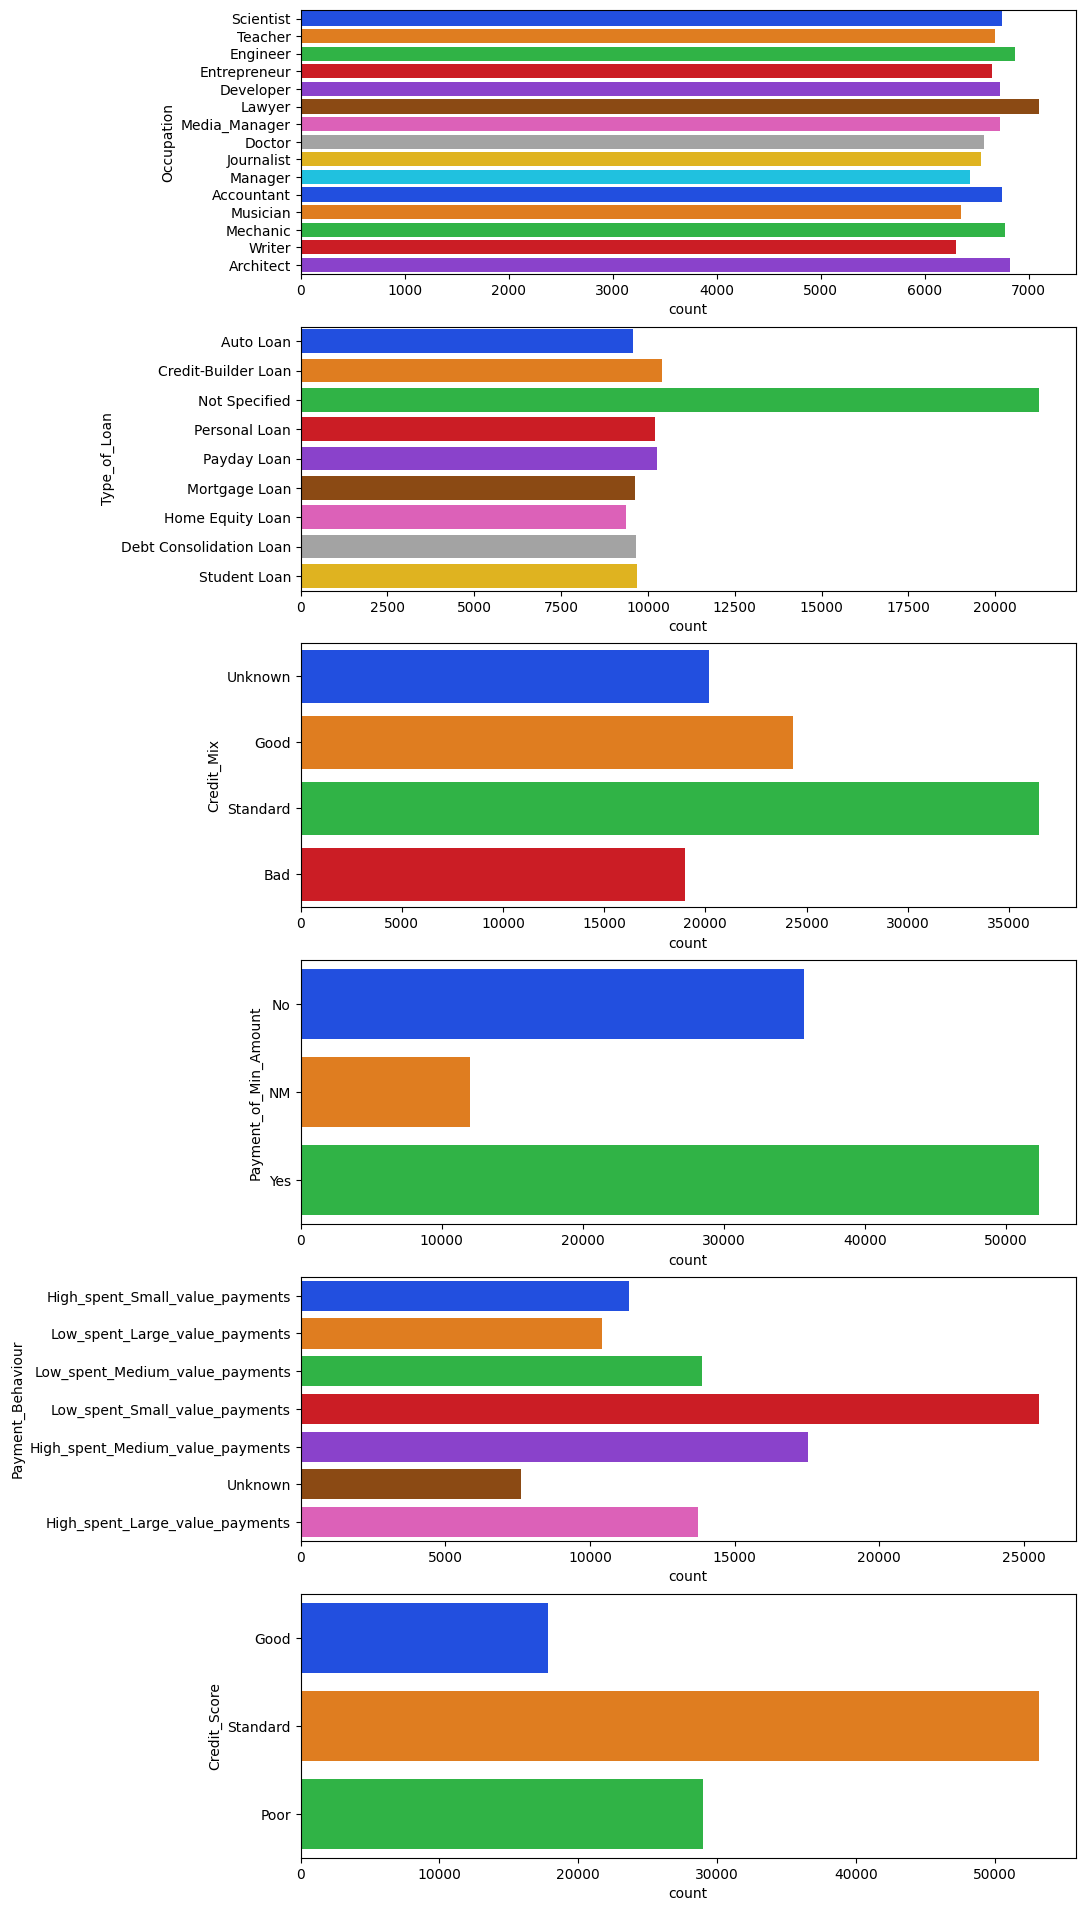

In [56]:
categorical_columns = [
    'Occupation',
    'Type_of_Loan',
    'Credit_Mix',
    'Payment_of_Min_Amount',
    'Payment_Behaviour',
    'Credit_Score'
]

fig, ax = plt.subplots(len(categorical_columns), 1, figsize=(10,24))
for i, feature in enumerate(categorical_columns):
    sns.countplot(data=cleaned_df, y=feature, ax=ax[i], palette='bright')
plt.show()

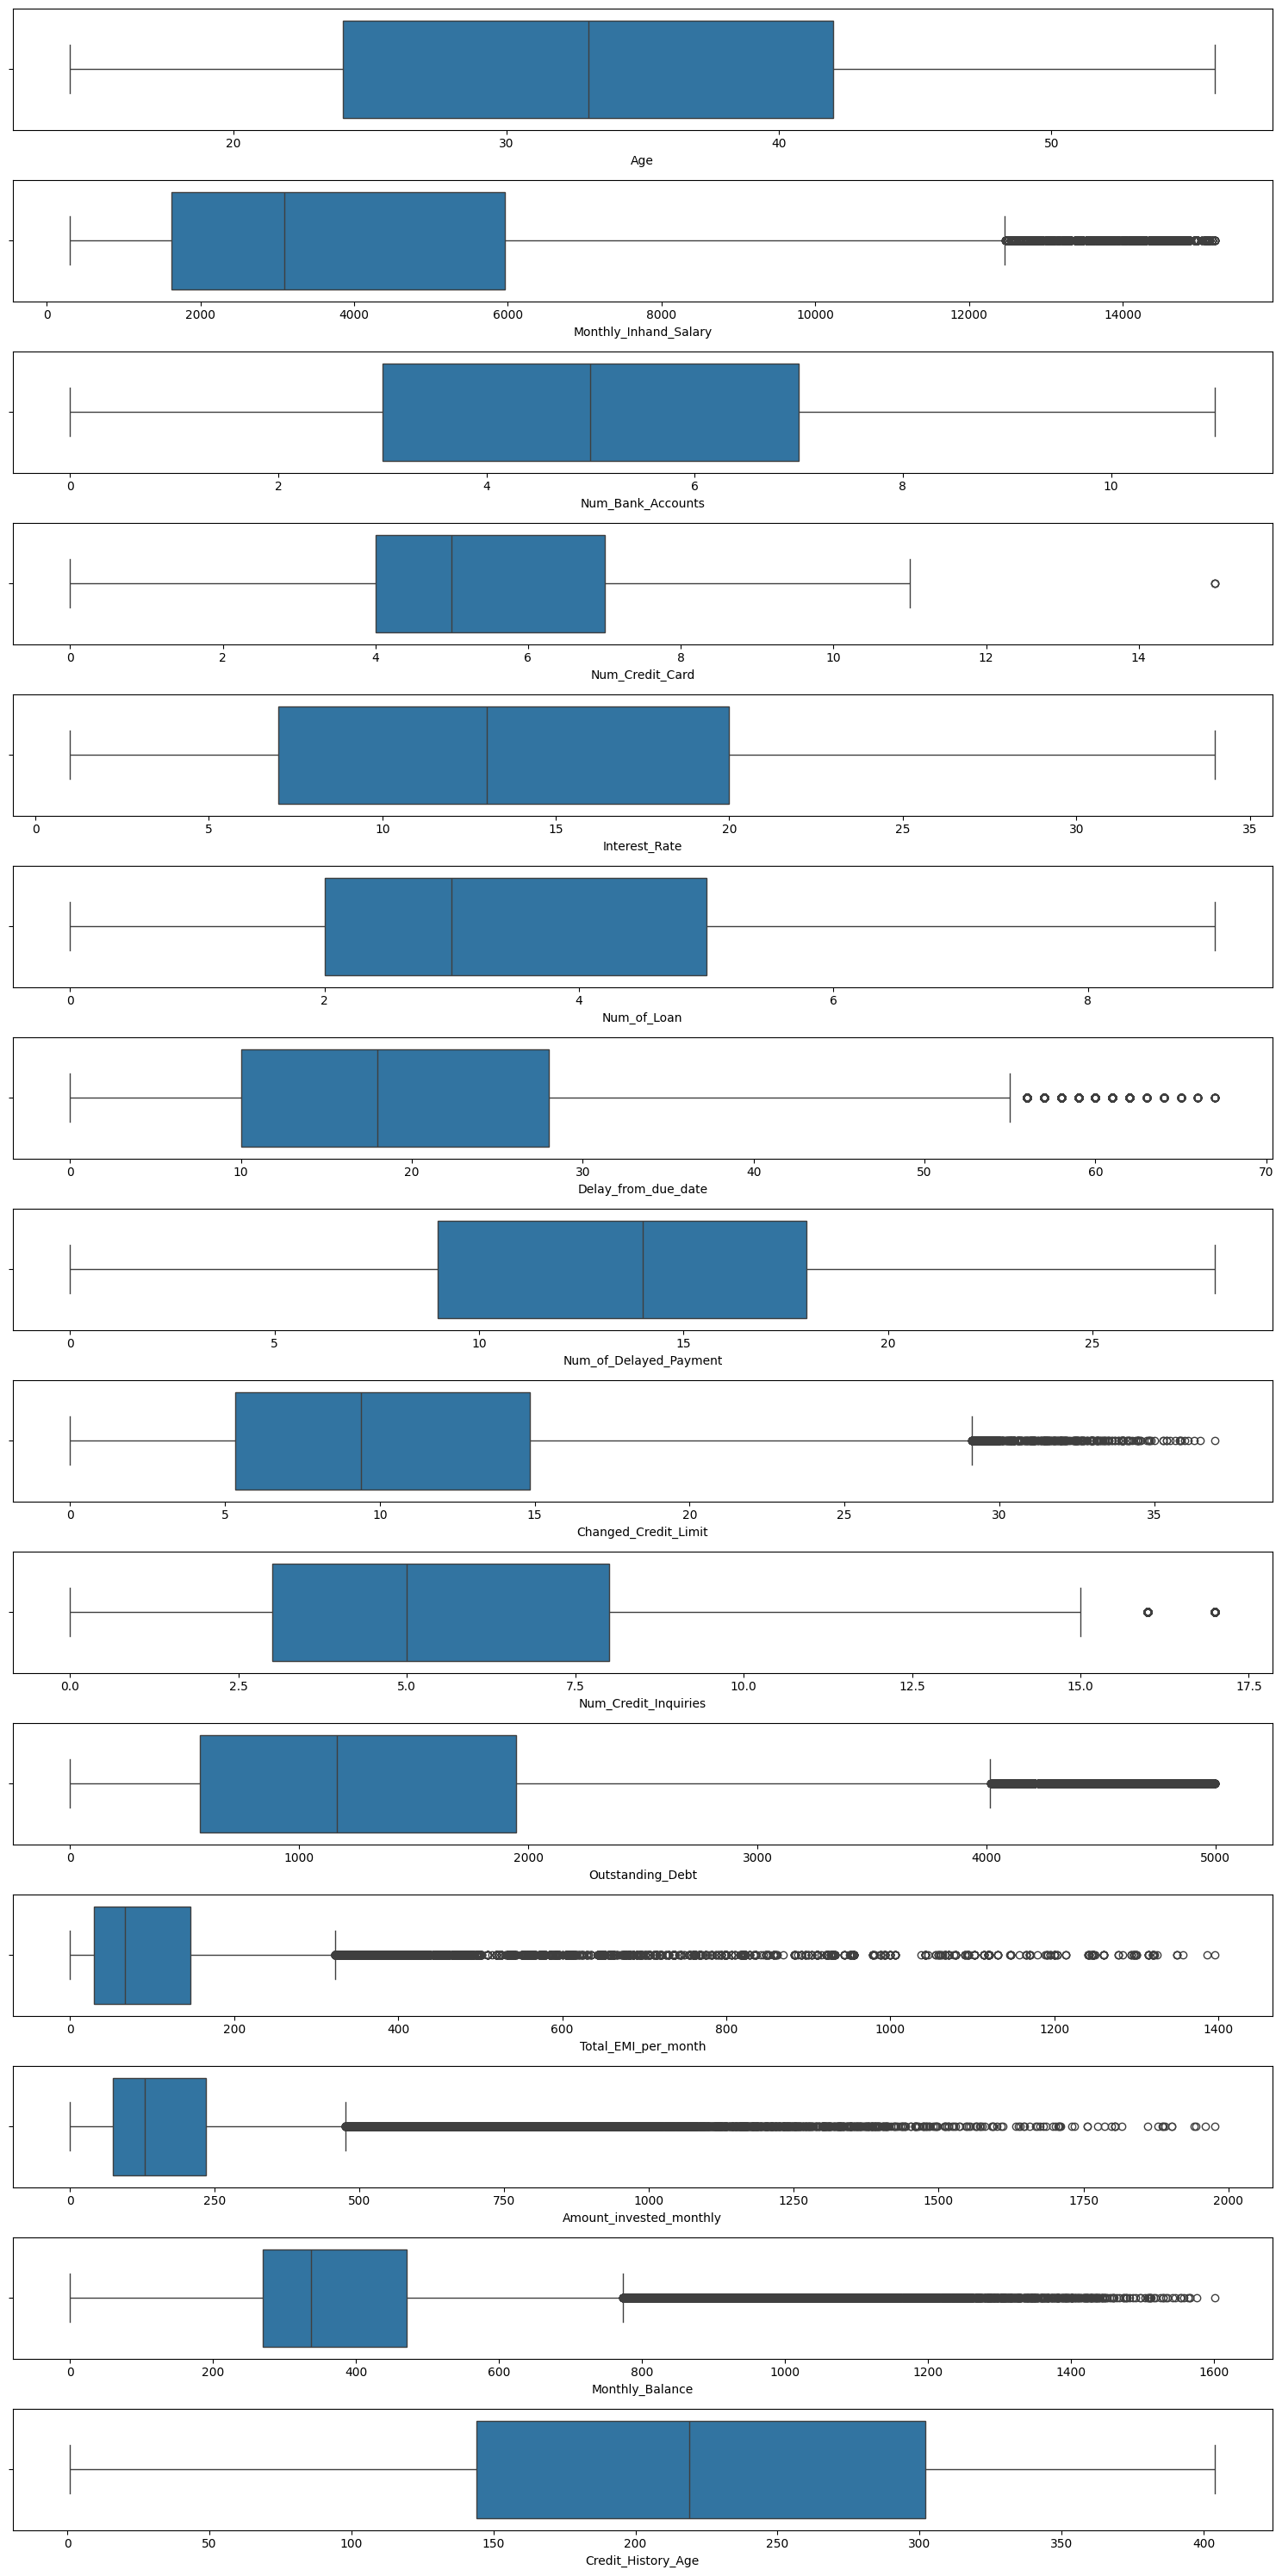

In [57]:
def numerical_dis_plot(features, df, segment_feature=None, showfliers=True):
    fig, ax = plt.subplots(len(features), 1,figsize=(15,30))
    for i, feature in enumerate(features):
        if segment_feature:
            sns.boxplot(y=segment_feature, x=feature, data=df, ax=ax[i], showfliers=showfliers, palette="tab10")
            ax[i].set_ylabel(None)
        else:
            sns.boxplot(x=feature, data=df, ax=ax[i], showfliers=showfliers)
    plt.tight_layout()
    plt.show()

numerical_dis_plot(
    features=numerical_columns,
    df=cleaned_df
)

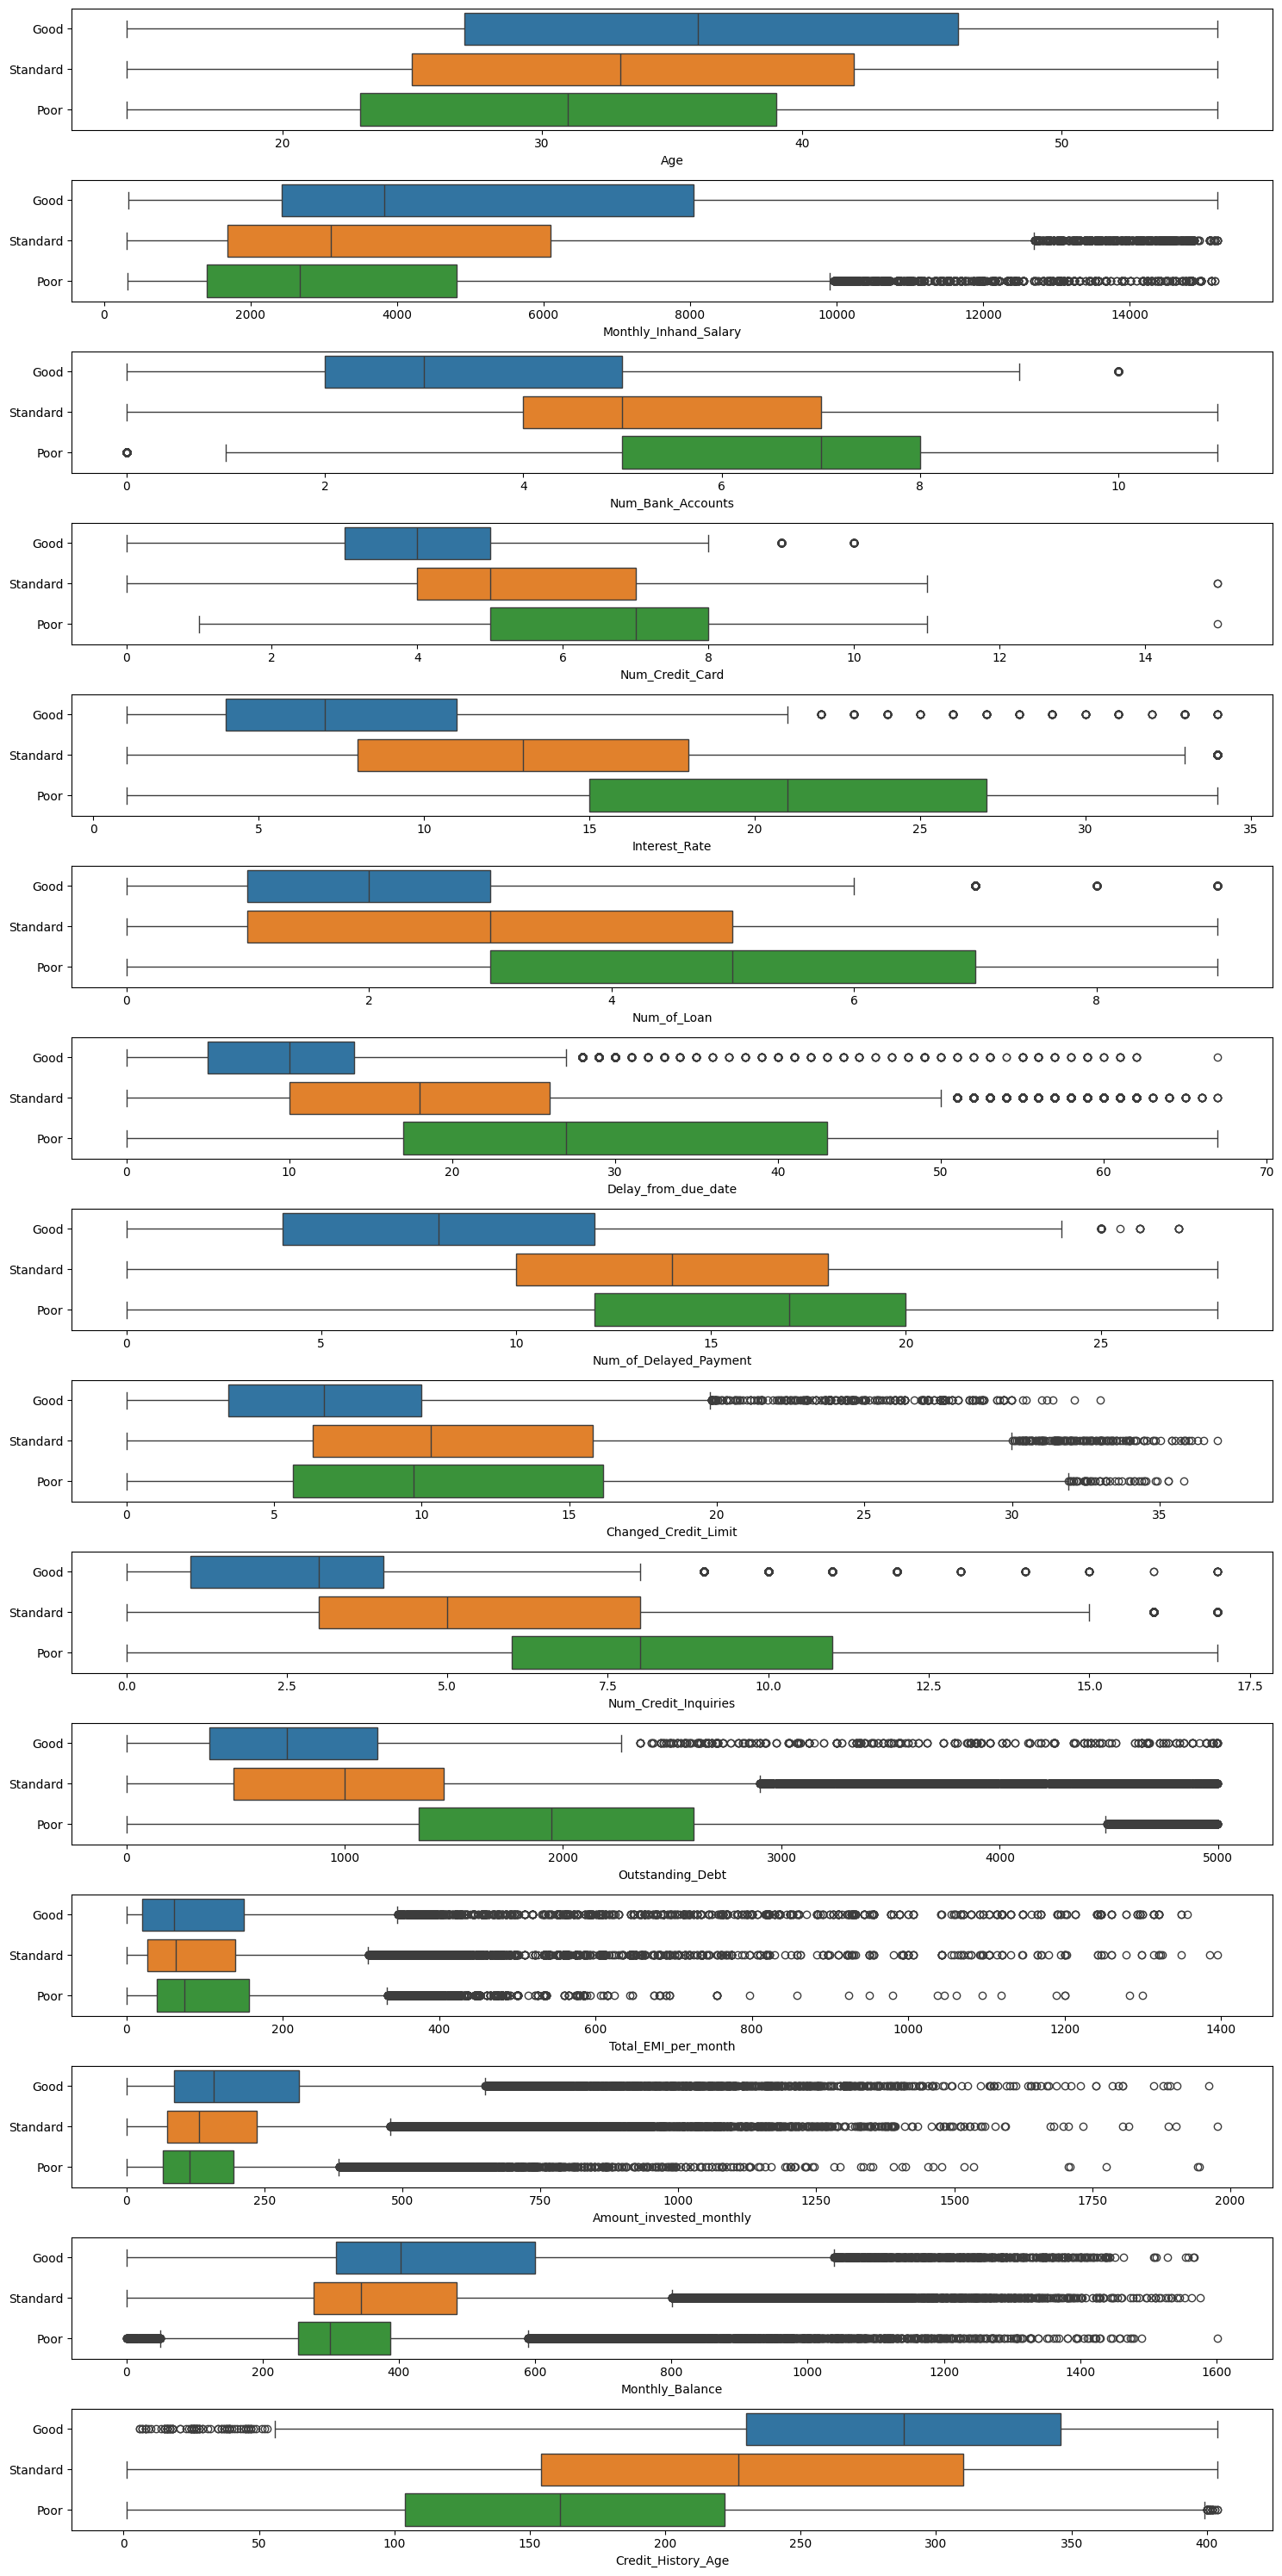

In [58]:
# Check numerical feature by credit score
numerical_dis_plot(
    features=numerical_columns,
    df=cleaned_df,
    segment_feature="Credit_Score"
)

In [59]:
# helper function untuk Distribusi Nilai Kategorik
def categorical_plot(features, df, segment_feature=None):
    fix, ax = plt.subplots(len(features), 1, figsize=(10, 20)) # 1 for vertical
    for i, feature in enumerate(features):
        if segment_feature:
            sns.countplot(data=df, y=segment_feature, hue=feature, ax=ax[i])
        else:
            sns.countplot(data=df, x=featute, ax=ax[i])
    plt.tight_layout()
    plt.show()

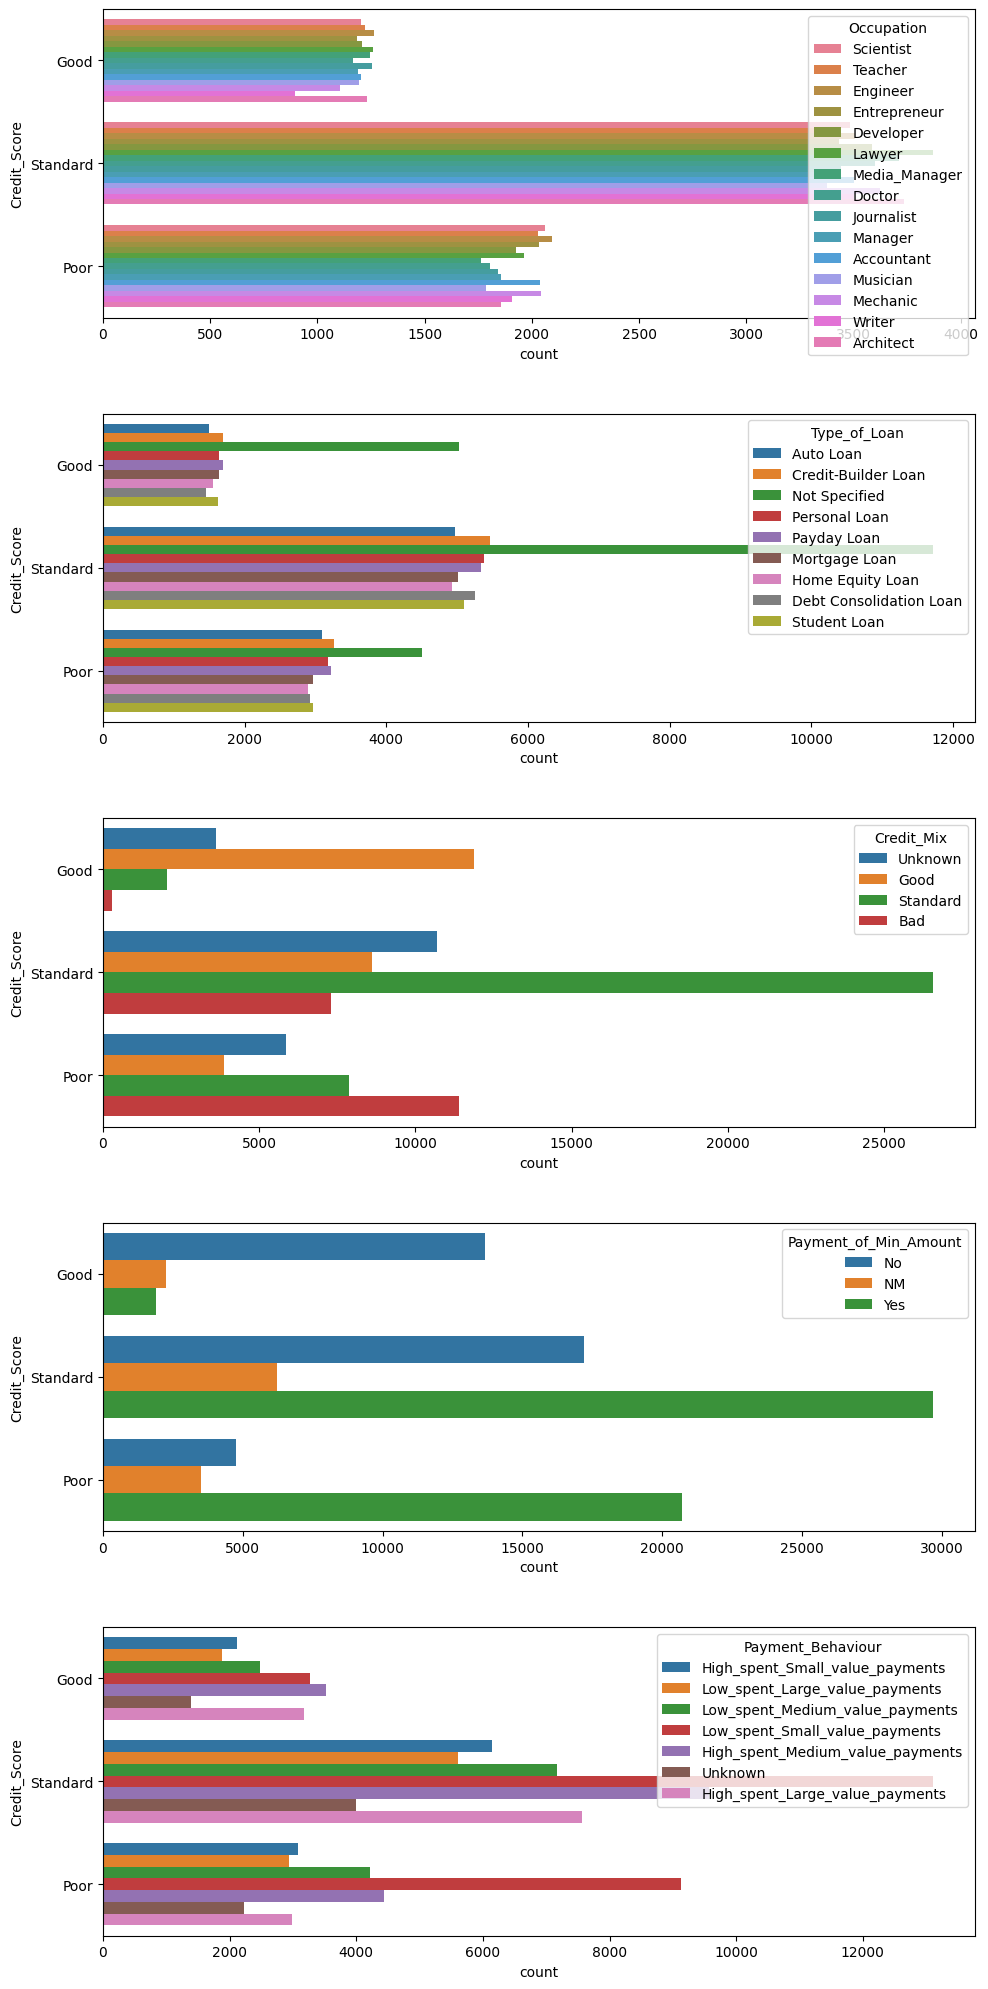

In [60]:
categorical_plot(
    features=[
        'Occupation',
        'Type_of_Loan',
        'Credit_Mix',
        'Payment_of_Min_Amount',
        'Payment_Behaviour'
    ],
    df=cleaned_df,
    segment_feature="Credit_Score"
)

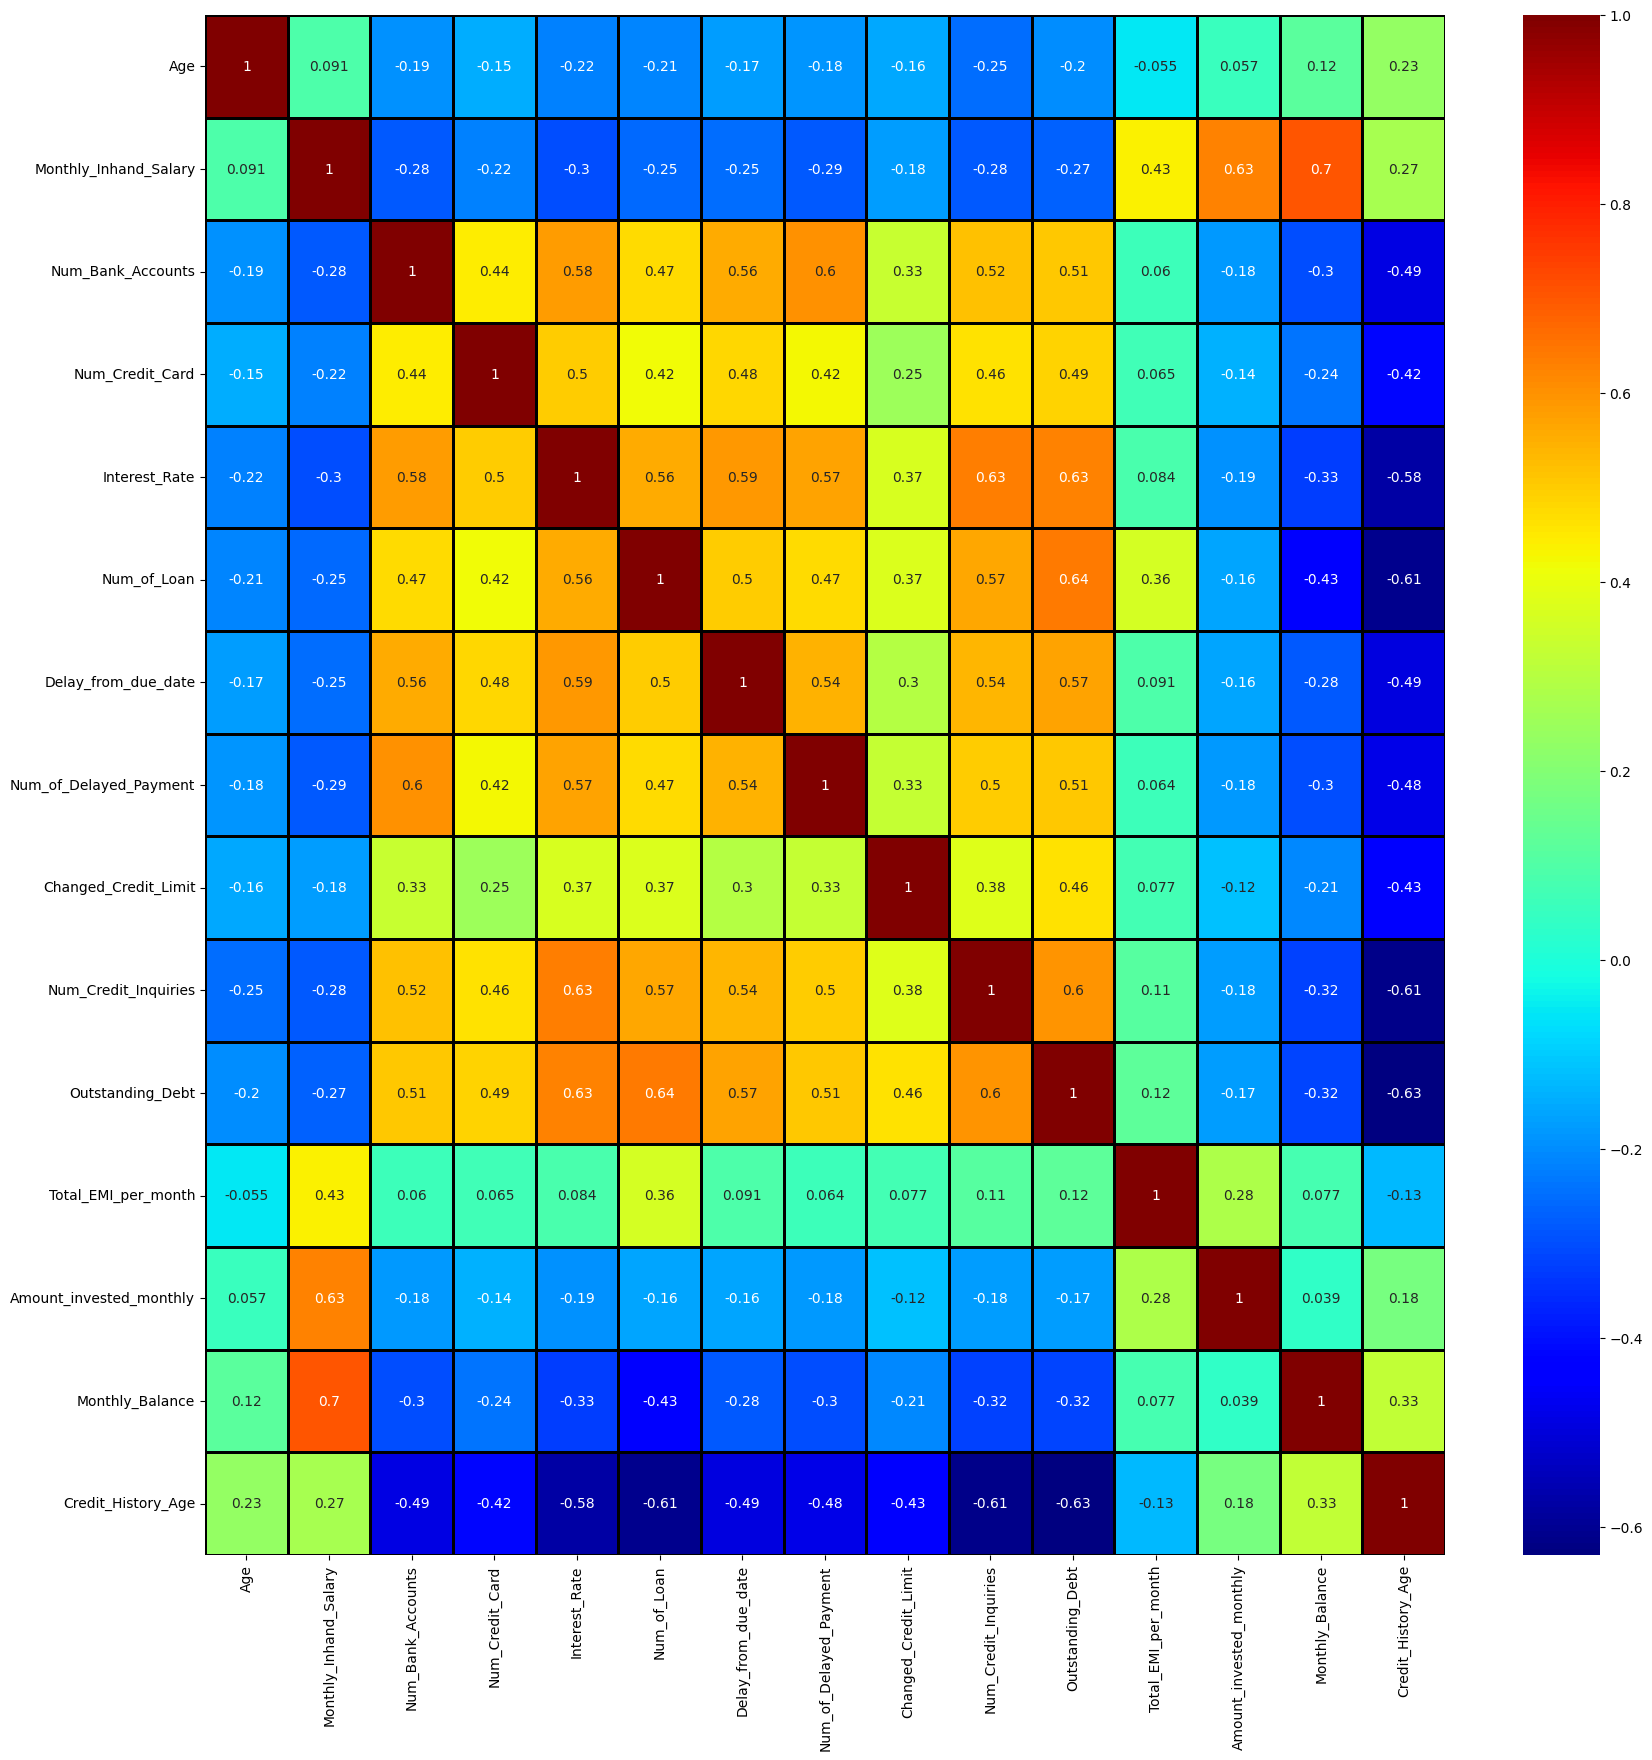

In [61]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df[numerical_columns].corr(), annot=True, cmap='jet', linecolor='black', linewidth=1)
plt.show()

# Data Preprocessing

In [62]:
# Drop unused columns
new_cleaned_df = cleaned_df.drop(columns=['Customer_ID', 'Month', 'Occupation', 'Type_of_Loan', 'Credit_Utilization_Ratio'], axis=1)
new_cleaned_df.head()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Unknown,809.98,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,23.0,1824.843333,3.0,4.0,3.0,4.0,0.0,6.0,11.27,4.0,Good,809.98,265.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,23.0,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,Good,809.98,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,23.0,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,Good,809.98,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,23.0,1824.843333,3.0,4.0,3.0,4.0,6.0,6.0,11.27,4.0,Good,809.98,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [63]:
# Split data
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(new_cleaned_df, test_size = 0.05, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print(train_df.shape)
print(test_df.shape)

(95000, 19)
(5000, 19)


<function matplotlib.pyplot.show(close=None, block=None)>

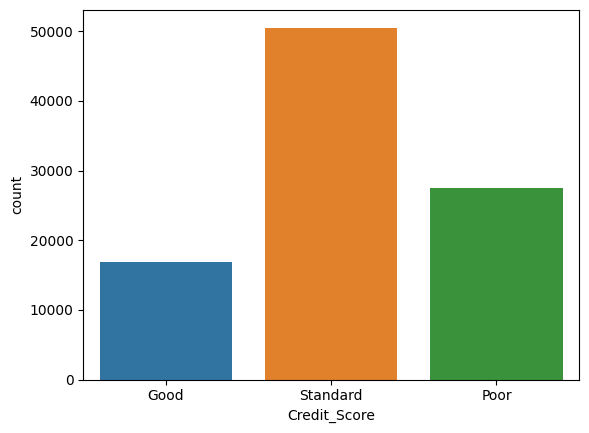

In [64]:
sns.countplot(data=train_df, x="Credit_Score", palette='tab10')
plt.show

In [65]:
train_df.Credit_Score.value_counts()

Credit_Score
Standard    50525
Poor        27539
Good        16936
Name: count, dtype: int64

In [66]:
# Group data minority and majority
df_majority_1 = train_df[(train_df.Credit_Score == "Standard")]
df_majority_2 = train_df[(train_df.Credit_Score == "Poor")]
df_minority = train_df[(train_df.Credit_Score == "Good")]

In [67]:
from sklearn.utils import resample

df_majority_1_undersampled = resample(df_majority_1, n_samples=16936, random_state=42)
df_majority_2_undersampled = resample(df_majority_2, n_samples=16936, random_state=42)
print(df_majority_1_undersampled.shape)
print(df_majority_2_undersampled.shape)

(16936, 19)
(16936, 19)


In [68]:
# Merge Dataset
from sklearn.utils import shuffle

undersampled_train_df = pd.concat([df_minority, df_majority_1_undersampled]).reset_index(drop=True)
undersampled_train_df = pd.concat([undersampled_train_df, df_majority_2_undersampled]).reset_index(drop=True)
undersampled_train_df = shuffle(undersampled_train_df, random_state=42)
undersampled_train_df.reset_index(drop=True, inplace=True)
undersampled_train_df.sample(5)

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
11641,32.0,2202.075000,8.0,4.0,15.0,4.0,20.0,12.0,15.63,5.0,Standard,1182.19,235.0,Yes,57.139982,251.345605,Low_spent_Small_value_payments,201.721913,Standard
26937,32.0,3435.879167,5.0,2.0,12.0,3.0,1.0,4.0,6.48,3.0,Good,67.98,197.0,No,60.313384,101.607667,High_spent_Medium_value_payments,431.666866,Good
9389,45.0,2854.991667,5.0,4.0,10.0,0.0,32.0,0.0,3.34,6.0,Good,1015.81,313.0,No,0.000000,48.689440,High_spent_Large_value_payments,476.809727,Poor
24026,39.0,5075.941667,3.0,4.0,5.0,2.0,7.0,5.0,7.21,6.0,Good,1265.70,191.0,No,104.460342,162.299031,High_spent_Small_value_payments,500.834794,Good
25610,33.0,2876.971667,10.0,8.0,22.0,7.0,33.0,20.0,21.47,10.0,Unknown,4300.40,24.0,Yes,188.475804,62.619720,High_spent_Medium_value_payments,286.601643,Poor


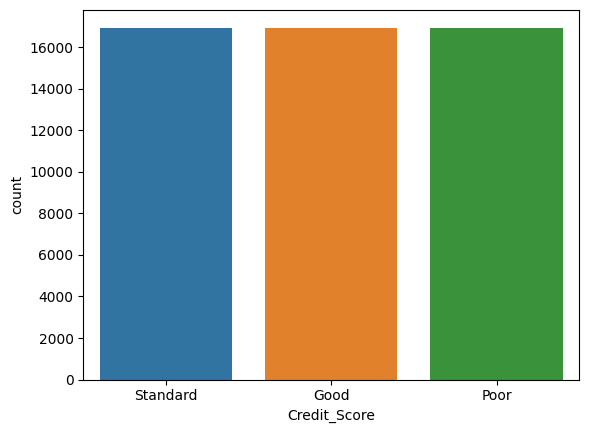

In [69]:
# Validate data balance
sns.countplot(data=undersampled_train_df, x="Credit_Score", palette='tab10')
plt.show()

In [70]:
# Split Fitur train dan target
X_train = undersampled_train_df.drop(columns="Credit_Score", axis=1)
y_train = undersampled_train_df["Credit_Score"]

X_test = test_df.drop(columns="Credit_Score", axis=1)
y_test = test_df["Credit_Score"]

In [71]:
# Helper Function for Scaling and Encoding

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import joblib

def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))

            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            df_test["{}".format(feature)] = scaler.transform(X_test)
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            scaler.fit(X)
            df["{}".format(feature)] = scaler.transform(X)
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
        return df

def encoding(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))

            df_test["{}".format(feature)] = encoder.transform(df_test[feature])
        return df, df_test
    else:
        df = df.copy()
        for feature in features:
            encoder = LabelEncoder()
            encoder.fit(df[feature])
            df["{}".format(feature)] = encoder.transform(df[feature])
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))
        return df

In [75]:
# Scaling and Encoding features

numerical_columns = [
    'Age',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Total_EMI_per_month',
    'Amount_invested_monthly',
    'Monthly_Balance',
    'Credit_History_Age'
]

categorical_columns = [
    'Credit_Mix',
    'Payment_of_Min_Amount',
    'Payment_Behaviour'
]

new_train_df, new_test_df = scaling(numerical_columns, X_train, X_test)
new_train_df, new_test_df = encoding(categorical_columns, new_train_df, new_test_df)

In [76]:
new_train_df.head()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0.690476,0.237662,0.454545,0.636364,0.242424,0.666667,0.194030,0.392857,0.387503,0.529412,2,0.483121,0.439206,2,0.113024,0.025093,0,0.266400
1,0.190476,0.503576,0.363636,0.454545,0.030303,0.444444,0.179104,0.392857,0.171828,0.235294,1,0.289799,0.732010,1,0.111900,0.080054,0,0.451454
2,0.428571,0.090128,0.272727,0.636364,0.121212,0.444444,0.208955,0.285714,0.274322,0.117647,1,0.168241,0.918114,1,0.033189,0.021363,3,0.221049
3,0.476190,0.126136,0.454545,0.636364,0.272727,0.444444,0.194030,0.642857,0.057002,0.117647,1,0.063219,0.908189,0,0.060780,0.020599,0,0.212522
4,0.452381,0.104396,0.363636,0.454545,0.303030,0.444444,0.268657,0.000000,0.036722,0.058824,1,0.025547,0.838710,1,0.050268,0.082627,5,0.155497


In [77]:
# Encode target features in train dan test set
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y_train)
new_y_train = encoder.transform(y_train)
joblib.dump(encoder, "model/encoder_target.joblib")

new_y_test = encoder.transform(y_test)

### PCA

In [78]:
# Take correlated features -> reference from heatmap
pca_numerical_columns_1 = [
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Credit_History_Age'
]

pca_numerical_columns_2 = [
    'Monthly_Inhand_Salary',
    'Monthly_Balance',
    'Amount_invested_monthly',
    'Total_EMI_per_month'
]

In [79]:
train_pca_df = new_train_df.copy().reset_index(drop=True)
test_pca_df = new_test_df.copy().reset_index(drop=True)

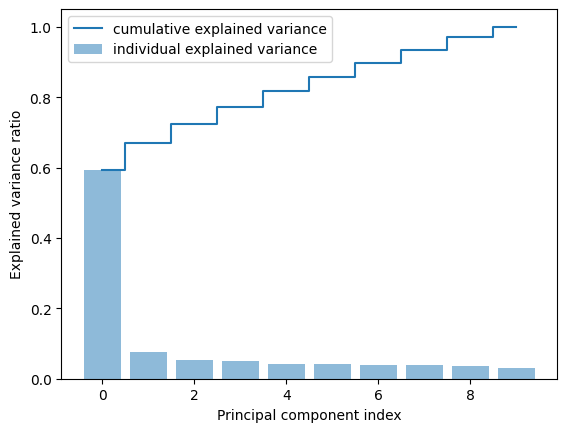

In [80]:
from sklearn.decomposition import PCA

pca = PCA(n_components=len(pca_numerical_columns_1), random_state=123)
pca.fit(train_pca_df[pca_numerical_columns_1])
princ_comp = pca.transform(train_pca_df[pca_numerical_columns_1])

var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(pca_numerical_columns_1)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns_1)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [81]:
# PCA with n = 5
pca_1 = PCA(n_components=5, random_state=123)
pca_1.fit(train_pca_df[pca_numerical_columns_1])
joblib.dump(pca_1, "model/pca_{}.joblib".format(1))
princ_comp_1 = pca_1.transform(train_pca_df[pca_numerical_columns_1])
train_pca_df[["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"]] = pd.DataFrame(princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"])
train_pca_df.drop(columns=pca_numerical_columns_1, axis=1, inplace=True)
train_pca_df.head()

,Age,Monthly_Inhand_Salary,Credit_Mix,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5
0,0.690476,0.237662,2,2,0.113024,0.025093,0,0.266400,0.215967,0.335006,0.056187,0.047697,0.147047
1,0.190476,0.503576,1,1,0.111900,0.080054,0,0.451454,-0.319090,0.112741,0.227276,0.055502,0.117496
2,0.428571,0.090128,1,1,0.033189,0.021363,3,0.221049,-0.419284,0.069814,0.232473,-0.110948,0.250861
3,0.476190,0.126136,1,0,0.060780,0.020599,0,0.212522,-0.257280,-0.237472,0.376891,-0.068669,0.012678
4,0.452381,0.104396,1,1,0.050268,0.082627,5,0.155497,-0.502601,0.073807,0.226035,-0.284458,-0.015841


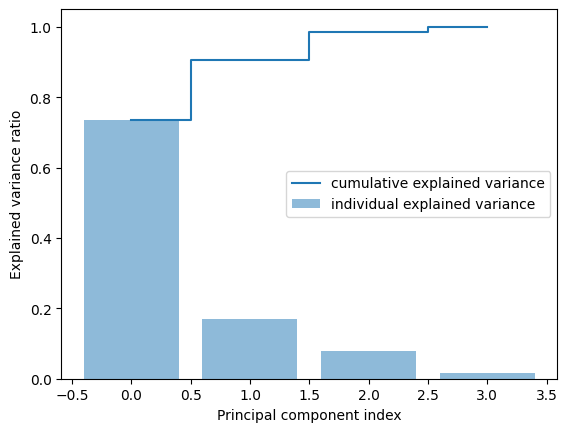

In [82]:
pca = PCA(n_components=len(pca_numerical_columns_2), random_state=123)
pca.fit(train_pca_df[pca_numerical_columns_2])
princ_comp = pca.transform(train_pca_df[pca_numerical_columns_2])

var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(len(pca_numerical_columns_2)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns_2)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [83]:
# PCA with n = 2
pca_2 = PCA(n_components=2, random_state=123)
pca_2.fit(train_pca_df[pca_numerical_columns_2])
joblib.dump(pca_2, "model/pca_{}.joblib".format(2))
princ_comp_2 = pca_2.transform(train_pca_df[pca_numerical_columns_2])
train_pca_df[["pc2_1", "pc2_2"]] = pd.DataFrame(princ_comp_2, columns=["pc2_1", "pc2_2"])
train_pca_df.drop(columns=pca_numerical_columns_2, axis=1, inplace=True)
train_pca_df.head()

,Age,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5,pc2_1,pc2_2
0,0.690476,2,2,0,0.215967,0.335006,0.056187,0.047697,0.147047,-0.041153,0.042993
1,0.190476,1,1,0,-0.319090,0.112741,0.227276,0.055502,0.117496,0.278922,0.109200
2,0.428571,1,1,3,-0.419284,0.069814,0.232473,-0.110948,0.250861,-0.200170,0.056832
3,0.476190,1,0,0,-0.257280,-0.237472,0.376891,-0.068669,0.012678,-0.168846,0.037691
4,0.452381,1,1,5,-0.502601,0.073807,0.226035,-0.284458,-0.015841,-0.198205,-0.034669


In [84]:
# PCA for test_set
test_princ_comp_1 = pca_1.transform(test_pca_df[pca_numerical_columns_1])
test_pca_df[["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"]] = pd.DataFrame(test_princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"])
test_pca_df.drop(columns=pca_numerical_columns_1, axis=1, inplace=True)

test_princ_comp_1 = pca_2.transform(test_pca_df[pca_numerical_columns_2])
test_pca_df[["pc2_1", "pc2_2"]] = pd.DataFrame(test_princ_comp_1, columns=["pc2_1", "pc2_2"])
test_pca_df.drop(columns=pca_numerical_columns_2, axis=1, inplace=True)
test_pca_df.head()

,Age,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5,pc2_1,pc2_2
0,0.380952,1,1,0,-0.587977,0.065733,-0.240664,-0.074134,0.170567,-0.029592,0.141671
1,0.095238,0,2,5,0.760531,0.286918,-0.114280,0.250767,0.198645,-0.239788,-0.016467
2,0.642857,1,1,5,-0.441124,0.204247,-0.141170,0.030998,-0.200501,0.627704,-0.211694
3,0.500000,2,2,5,0.360242,-0.118104,-0.383711,-0.236119,-0.240762,-0.196577,0.059574
4,0.309524,1,1,1,-0.504527,0.468683,-0.080164,-0.094325,-0.195725,0.255807,0.113497


# Modeling

### Grid Search

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = {
    "penalty": ["l1","l2"],
    "C": [0.01, 0.1, 1]
}

log_model = LogisticRegression(random_state=123)

CV_lr = GridSearchCV(estimator=log_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_lr.fit(train_pca_df, new_y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=123), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2']})

### Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_model = DecisionTreeClassifier(random_state=123)

param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [5, 6, 7, 8],
    'criterion' :['gini', 'entropy']
}

CV_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, n_jobs=-1)
CV_tree.fit(train_pca_df, new_y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [87]:
print("best parameters: ", CV_tree.best_params_)

best parameters:  {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'}


In [88]:
tree_model = DecisionTreeClassifier(
    random_state=123,
    criterion='entropy',
    max_depth=6,
    max_features='sqrt'
)

tree_model.fit(train_pca_df, new_y_train)
joblib.dump(tree_model, "model/tree_model.joblib")

['model/tree_model.joblib']

### Random Forest

In [89]:
from sklearn.ensemble import RandomForestClassifier

rdf_model = RandomForestClassifier(
    random_state=123,
    max_depth=8,
    n_estimators=500,
    max_features='sqrt',
    criterion='gini',
    n_jobs=-1
)
rdf_model.fit(train_pca_df, new_y_train)
joblib.dump(rdf_model, "model/rdf_model.joblib")


['model/rdf_model.joblib']

# Evaluation

In [90]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluating(y_pred, y_true):
    '''Evaluasi model'''
    labels = ['Good', 'Poor', 'Standard']

    print(classification_report(y_pred=y_pred, y_true=y_true))

    cnf_matrix = confusion_matrix(y_pred=y_pred, y_true=y_true, labels=labels)
    confusion_matrix_df = pd.DataFrame(cnf_matrix, labels, labels)
    sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
    plt.ylabel('True label', fontsize=15)
    plt.xlabel('Predicted label', fontsize=15)
    plt.show()

    return confusion_matrix_df


===== Decision Tree Model Evaluation =====
              precision    recall  f1-score   support

        Good       0.49      0.82      0.62       892
        Poor       0.48      0.78      0.59      1459
    Standard       0.82      0.35      0.49      2649

    accuracy                           0.56      5000
   macro avg       0.60      0.65      0.57      5000
weighted avg       0.66      0.56      0.54      5000



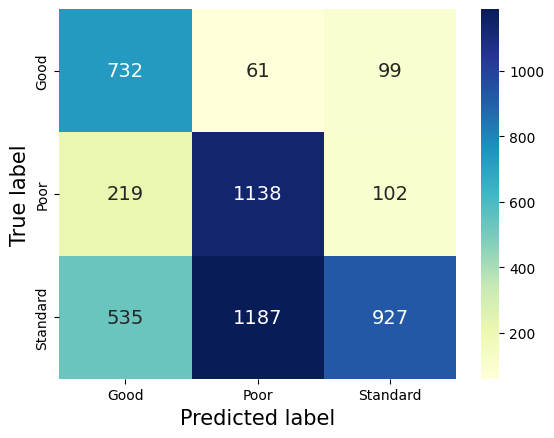

,Good,Poor,Standard
Good,732,61,99
Poor,219,1138,102
Standard,535,1187,927


In [91]:
y_pred_test = tree_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

print("===== Decision Tree Model Evaluation =====")
evaluating(y_pred=y_pred_test, y_true=y_test)

===== Random Forest Model Evaluation =====
              precision    recall  f1-score   support

        Good       0.50      0.83      0.62       892
        Poor       0.64      0.74      0.68      1459
    Standard       0.83      0.58      0.68      2649

    accuracy                           0.67      5000
   macro avg       0.66      0.71      0.66      5000
weighted avg       0.71      0.67      0.67      5000



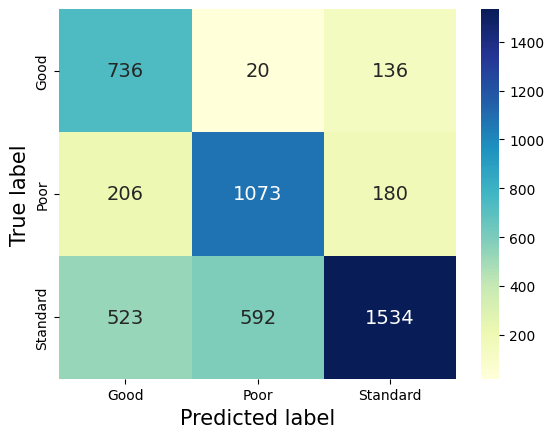

,Good,Poor,Standard
Good,736,20,136
Poor,206,1073,180
Standard,523,592,1534


In [92]:
y_pred_test = rdf_model.predict(test_pca_df)
y_pred_test = encoder.inverse_transform(y_pred_test)

print("===== Random Forest Model Evaluation =====")
evaluating(y_pred=y_pred_test, y_true=y_test)

In [93]:
def plot_feature_importances(feature_importances, cols):
    features = pd.DataFrame(feature_importances, columns=['coef_value']).set_index(cols)
    features = features.sort_values(by='coef_value', ascending=False)
    top_features = features

    plt.figure(figsize=(10, 6))
    sns.barplot(x='coef_value', y=features.index, data=features)
    plt.show()
    return top_features


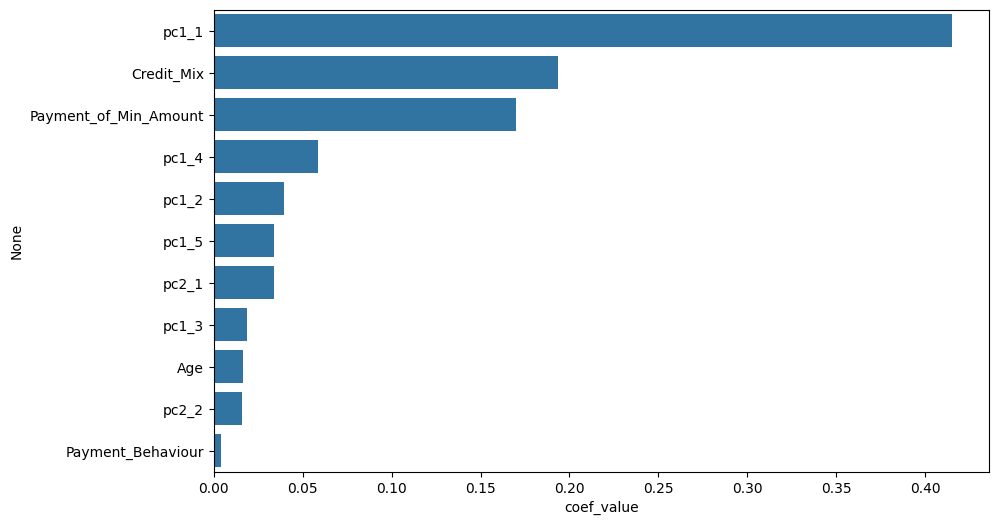

,coef_value
pc1_1,0.415040
Credit_Mix,0.193811
Payment_of_Min_Amount,0.169676
pc1_4,0.058384
pc1_2,0.039469
pc1_5,0.034060
pc2_1,0.033930
pc1_3,0.018885
Age,0.016476
pc2_2,0.016035


In [94]:
plot_feature_importances(rdf_model.feature_importances_, train_pca_df.columns)
